<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 25px; font-weight: bold; font-family: Helvetica">
Lab5: โครงข่ายประสาทเทียมแบบคอนโวลูชัน (Convolutional Neural Networks)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [2]:
import cv2 # นำเข้าไลบรารี cv2
import os # นำเข้าไลบรารี os
import numpy as np # นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import matplotlib.pyplot as plt # นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import pandas as pd # นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import seaborn as sns # นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
from tqdm import tqdm # นำเข้าไลบรารี tqdm

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [3]:
# ระบุ path ที่เก็บรูปภาพไว้
sdir = 'D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages'
filenames = []
fullpaths = []
labels = []
classlist = os.listdir(sdir)

# ทำซ้ำในการเก็บข้อมูลชื่อไฟล์ และ path ของไฟล์ เก็บไว้ใน list ต่างๆ
for klass in classlist:
    classpath = os.path.join(sdir, klass)
    flist = os.listdir(classpath)    
    for i, f in enumerate(flist):
        fpath = os.path.join(classpath, f)
        filenames.append(f)
        fullpaths.append(fpath)
        labels.append(klass)
        
# นำ list ของข้อมูลที่ได้ มาทำเป็น dataframe
df = pd.DataFrame({
    'fullpaths': fullpaths,
    'filenames': filenames,
    'labels': labels
})

# แสดง dataframe
df

,fullpaths,filenames,labels
0,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",04l5I8TqdzF9WDMJ.png,paper
1,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",0a3UtNzl5Ll3sq8K.png,paper
2,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",0cb6cVL8pkfi4wF6.png,paper
3,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",0eqArS2GgsBeqgSn.png,paper
4,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",0Og76sl5CJhbxWWx.png,paper
...,...,...,...
2183,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",zV0yCNG0C9s4GId3.png,scissors
2184,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",zyml8p6mHzWWJTyw.png,scissors
2185,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",ZyZeKfG5s1J9Qn64.png,scissors
2186,"D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...",Zz1djgkAdRqsHM3z.png,scissors


In [4]:
# แสดงตัวอย่างของแถวใน dataframe แบบสุ่ม 10 แถว
df[['filenames','labels']].sample(10) 

,filenames,labels
1847,MfDDFjVkEdWKPi2X.png,scissors
1157,nkwwKfU69znG7Bi3.png,rock
276,GelC88IvDZoRejHp.png,paper
1214,PP5HF3TrSg1DzqjX.png,rock
1981,RpIg0o9X94lDnNcX.png,scissors
329,JKN8VKp7pfMEQdBZ.png,paper
1837,m7ELYBy0O4wx0YqJ.png,scissors
171,C3j6RdTEo4jf6Cr4.png,paper
1627,dxFGJyDhnNu3iOmm.png,scissors
1126,Mc1ESNeg86L6CLRe.png,rock


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูลคลาส (labels) </h1>

In [5]:
df.labels.value_counts()

scissors    750
rock        726
paper       712
Name: labels, dtype: int64

scissors    750
rock        726
paper       712
Name: labels, dtype: int64


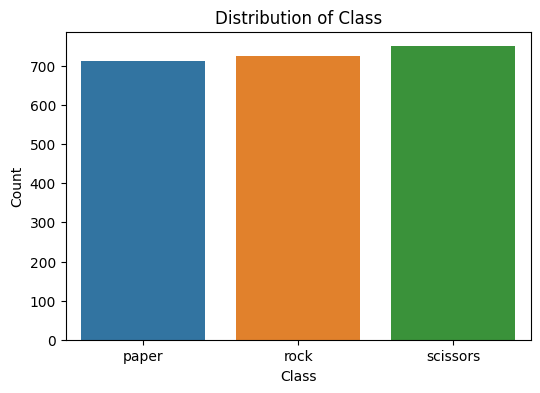

In [6]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'Class'
class_counts = df['labels'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='labels')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h1 style="font-size: 18px;">1.3 สำรวจข้อมูลรูปภาพ (images) </h1>

In [7]:
# อ่านภาพแถวที่ 1 ของ dataframe โดยใช้โมดูล cv2
sample_image = cv2.imread(df['fullpaths'][0])
# แสดงความกว้าง, ยาว, และจำนวน channels ของรูปภาพ
print('shape of image:', sample_image.shape)
# แสดง array ของรูปภาพ
print(sample_image)

shape of image: (200, 300, 3)
[[[ 53 143  65]
  [ 51 141  63]
  [ 50 140  62]
  ...
  [ 56 130  79]
  [ 55 128  78]
  [ 52 127  79]]

 [[ 51 142  61]
  [ 53 144  64]
  [ 52 143  63]
  ...
  [ 50 136  61]
  [ 51 137  62]
  [ 52 138  65]]

 [[ 55 145  65]
  [ 53 144  64]
  [ 55 145  65]
  ...
  [ 51 137  62]
  [ 51 137  62]
  [ 50 135  63]]

 ...

 [[ 51 156  62]
  [ 48 153  56]
  [ 49 154  58]
  ...
  [ 62 164  75]
  [ 62 164  75]
  [ 66 166  78]]

 [[ 49 153  59]
  [ 47 152  55]
  [ 50 155  59]
  ...
  [ 61 163  74]
  [ 63 166  76]
  [ 64 164  75]]

 [[ 52 157  63]
  [ 54 156  63]
  [ 56 157  64]
  ...
  [ 61 162  73]
  [ 64 164  75]
  [ 63 163  74]]]


In [8]:
# # แสดงภาพที่อ่านมา
# cv2.imshow('Sample_image', sample_image)
# # สั่งให้รอคำสั่งการปิดการแสดงผล (หากไม่ใส่อันนี้ ภาพจะแสดงและปิดลงทันที)
# cv2.waitKey()
# # เมื่อมีการกดแป้นพิมพ์ ให้ปิดการแสดงผลภาพ (ห้ามเอาออกเด็ดขาด)
# cv2.destroyAllWindows()

(200, 300, 3)


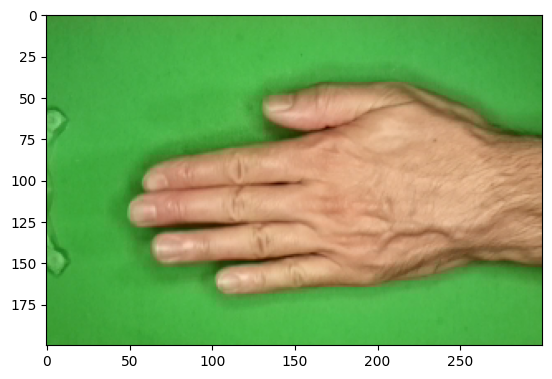

In [9]:
# โดยปกติแล้วการอ่านภาพของโมดูล cv2 แรกเริ่มจะเป็น BGR Format, เราจึงจะเปลี่ยนให้เป็น RGB format
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
# แสดงความกว้าง, ยาว, และจำนวน channels ของรูปภาพ
print(sample_image.shape)
# แสดงข้อมูล
plt.imshow(sample_image)

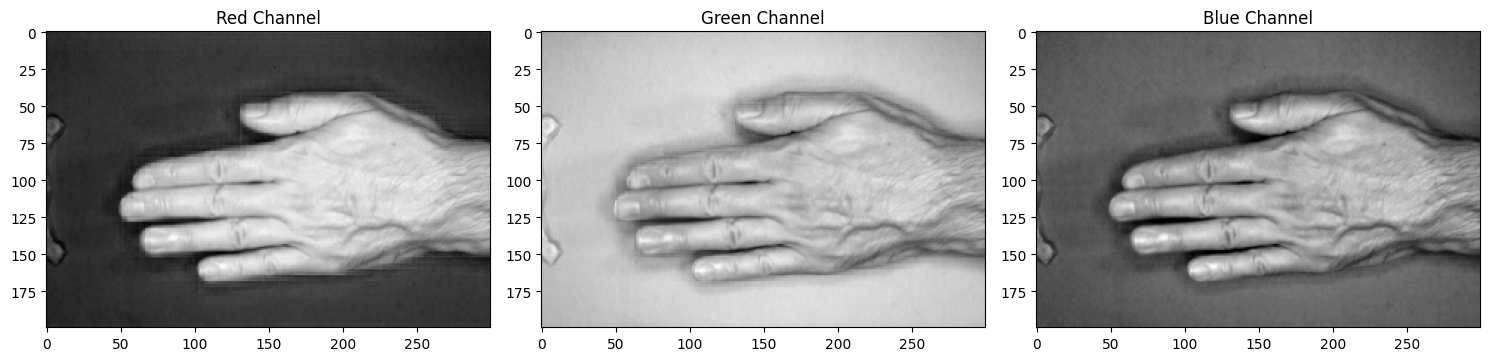

In [10]:
# สร้าง subplot
plt.figure(figsize=(15, 5))

# แสดงผล Red Channel
plt.subplot(1, 3, 1)
plt.imshow(sample_image[:,:,0], cmap='gray')
plt.title('Red Channel')

# แสดงผล Green Channel
plt.subplot(1, 3, 2)
plt.imshow(sample_image[:,:,1], cmap='gray')
plt.title('Green Channel')

# แสดงผล Blue Channel
plt.subplot(1, 3, 3)
plt.imshow(sample_image[:,:,2], cmap='gray')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()

In [11]:
# แสดงค่าสีแดงในภาพ
print(sample_image[:, :, 0])
print(sample_image[:, :, 0].shape)

[[65 63 62 ... 79 78 79]
 [61 64 63 ... 61 62 65]
 [65 64 65 ... 62 62 63]
 ...
 [62 56 58 ... 75 75 78]
 [59 55 59 ... 74 76 75]
 [63 63 64 ... 73 75 74]]
(200, 300)


In [12]:
# แสดงค่าสีเขียวในภาพ
print(sample_image[:, :, 1])
print(sample_image[:, :, 1].shape)

[[143 141 140 ... 130 128 127]
 [142 144 143 ... 136 137 138]
 [145 144 145 ... 137 137 135]
 ...
 [156 153 154 ... 164 164 166]
 [153 152 155 ... 163 166 164]
 [157 156 157 ... 162 164 163]]
(200, 300)


In [13]:
# แสดงค่าสีเขียวในภาพ
print(sample_image[:, :, 2])
print(sample_image[:, :, 2].shape)

[[53 51 50 ... 56 55 52]
 [51 53 52 ... 50 51 52]
 [55 53 55 ... 51 51 50]
 ...
 [51 48 49 ... 62 62 66]
 [49 47 50 ... 61 63 64]
 [52 54 56 ... 61 64 63]]
(200, 300)


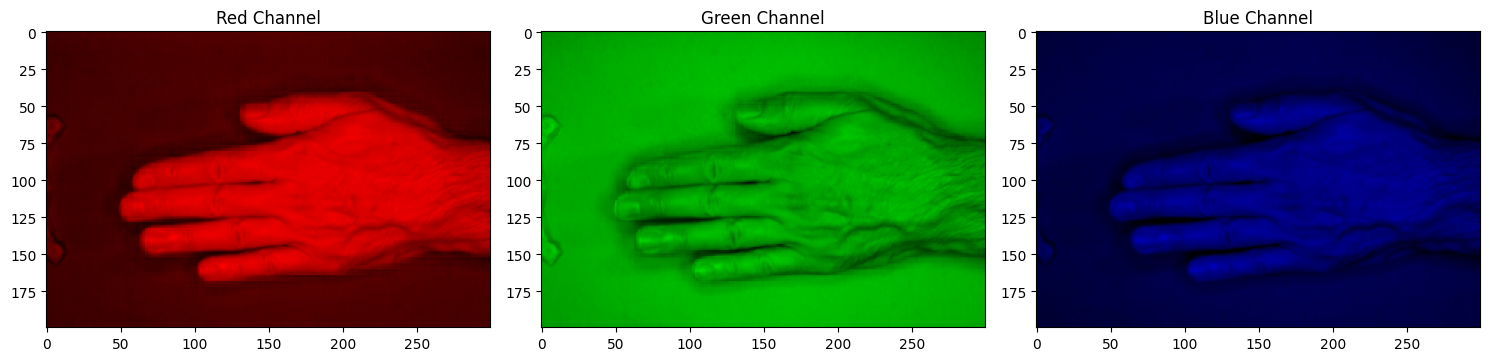

In [14]:
plt.figure(figsize=(15, 5))

# สร้าง array ที่มีค่า 0 ข้างในทั้งหมด และมีขนาดเท่าภาพจริง
zero_channel = np.zeros_like(sample_image[:,:,0])

# พลอตค่าสีแดง
plt.subplot(1, 3, 1)
red_channel = np.stack([sample_image[:,:,0], zero_channel, zero_channel], axis=2)
plt.imshow(red_channel)
plt.title('Red Channel')

# พลอตค่าสีเขียว
plt.subplot(1, 3, 2)
green_channel = np.stack([zero_channel, sample_image[:,:,1], zero_channel], axis=2)
plt.imshow(green_channel)
plt.title('Green Channel')

# พลอตค่าสีฟ้า
plt.subplot(1, 3, 3)
blue_channel = np.stack([zero_channel, zero_channel, sample_image[:,:,2]], axis=2)
plt.imshow(blue_channel)
plt.title('Blue Channel')

plt.tight_layout()
plt.show()

9it [00:00, 410.19it/s]


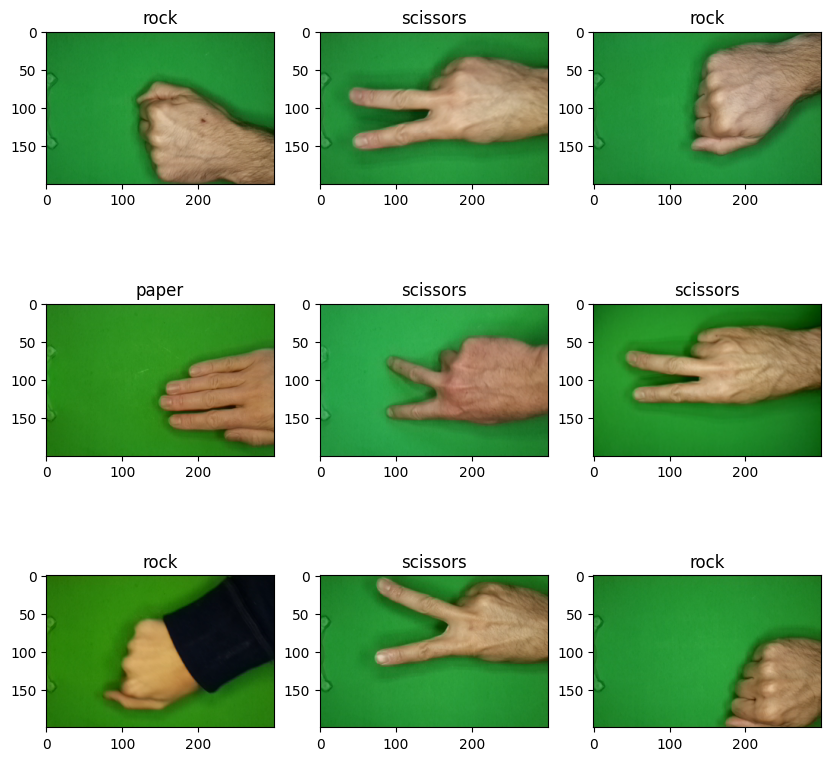

In [97]:
# แสดงตัวแย่างของภาพใน dataframe
samples = []
sample_labels = []

# สุ่มแถวทั้งหมด 9 แถวใน dataframe เก็บไว้ในตัวแปร sample_rows
sample_rows = df.sample(9)

for index, row in tqdm(sample_rows.iterrows()):
    img_bgr = cv2.imread(row['fullpaths'])
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    samples.append(img_rgb)
    sample_labels.append(row['labels'])

f, axarr = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        axarr[i, j].imshow(samples[i*3 + j], cmap='gray')
        axarr[i, j].set_title(sample_labels[i*3 + j])
        #axarr[i, j].axis('off')  # สามารถลบ axis ได้เพื่อให้ดูภาพได้ง่ายขึ้น

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. การเตรียมข้อมูลภาพและ label (Image Preprocessing)</h1>

<h1 style="font-size: 18px;">2.1 การเปลี่ยนขนาดภาพ (Resize) </h1>

(200, 300, 3)


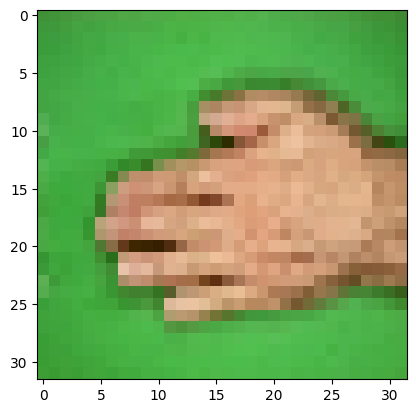

In [98]:
# คำสั่ง resize รูปภาพ
sample_image_resize = cv2.resize(sample_image,(32,32))
# แสดงความกว้าง, ยาว, และจำนวน channels ของรูปภาพ
print(sample_image.shape)
# แสดงข้อมูล
plt.imshow(sample_image_resize)

<h1 style="font-size: 18px;">2.2 เก็บภาพและ label ของภาพไว้ใน list </h1>

In [99]:
# คำสั่ง .iloc['index'] คือการระบุเลือกแแถว (index) ที่เราต้องการ มันจะ return ข้อมูลทั้งหมดที่มีในแถวนั้นพร้อมชื่อคอลัมน์ด้วย
df.iloc[0]

fullpaths    D:\ML-Labs\Lab4,5 - Neural Networks\RPSimages\...
filenames                                 04l5I8TqdzF9WDMJ.png
labels                                                   paper
Name: 0, dtype: object

In [100]:
# คำสั่ง .iloc['index']['column_name'] คือการระบุเลือกแแถว (index) ที่เราต้องการ และเลือกคอลัมน์ 'column_name' ที่ต้องการด้วย 
# มันจะ return ข้อมูลที่เราเจาะลงเลือกมาเท่านั้น
df.iloc[0]['fullpaths']

'D:\\ML-Labs\\Lab4,5 - Neural Networks\\RPSimages\\paper\\04l5I8TqdzF9WDMJ.png'

In [101]:
# ข้อมูลภาพทั้งหมด จะเก็บไว้ใน list ที่ชื่อ imglist
imglist = []
# ข้อมูล labels จะเก็บไว้ใน list ที่ชื่อ imglabels
imglabels = []

# ทำการอ่านข้อมูล dataframe ทีละแถว อ่านภาพ เก็บภาพใน imglist อ่าน labels เก็บ labels ไว้ใน imglabels
for i in tqdm(range(len(df))):
    image_path = df.iloc[i]['fullpaths'] # path ภาพ
    label = df.iloc[i]['labels'] # label ของภาพนั้น
    
    img = cv2.imread(image_path) # อ่านภาพจาก path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(32,32)) # resize ภาพ

    # เก็บภาพและ label ไว้ใน list
    if img is not None:
        imglist.append(img)
        imglabels.append(label)


100%|██████████| 2188/2188 [00:04<00:00, 444.28it/s]


In [102]:
# แปลง list ของ images ทั้งหมด เป็น array
img_array = np.array(imglist)
# แสดงผล
print(img_array.shape)

(2188, 32, 32, 3)


In [103]:
# แปลง list ของ labels ทั้งหมด เป็น array
imglabels = np.array(imglabels)
# แสดงผล
imglabels

array(['paper', 'paper', 'paper', ..., 'scissors', 'scissors', 'scissors'],
      dtype='<U8')

In [104]:
# นำเข้าไลบรารี keras.utils เพื่อเรียกใช้ to_categorical
from keras.utils import to_categorical
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [105]:
# สร้าง LabelEncoder ไว้ในตัวแปร label_encoder
label_encoder = LabelEncoder()
# Encode ข้อมูล จาก str เป็น int
integer_encoded = label_encoder.fit_transform(labels)
# แสดงผล
integer_encoded

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [106]:
# Encode ข้อมูล จาก int เป็น one-hot
imglabels = to_categorical(integer_encoded)
# แสดงผล
print(imglabels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


<h1 style="font-size: 18px;">ในตอนนี้เราจะมี array ของภาพทั้งหมดที่ถูก Preprocessing แล้ว เก็บไว้ในตัวแปรชื่อ <h2 style=" font-size: 18px; font-weight: bold; color: yellow">img_array</h2>
และ คลาสของมันในตัวแปรชื่อ <h2 style="font-size: 18px; font-weight: bold; color: yellow">imglabels</h2></h1>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [107]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [108]:
# แบ่งส่วนข้อมูล img_array เป็น X_train, X_test และ imglabels เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(img_array, imglabels, train_size=0.7, random_state=42, stratify=imglabels)

In [109]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 1531 , length of X_test: 657


In [110]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (1531, 32, 32, 3)
shape of X_test: (657, 32, 32, 3)
shape of y_train: (1531, 3)
shape of y_test: (657, 3)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. การใช้ Convolutional Neural Networks Model ด้วย Tensorflow-Keras</h1>

In [111]:
# นำเข้าไลบรารี tensorflow.keras.models เพื่อเรียกใช้ Sequential
from tensorflow.keras.models import Sequential
# นำเข้าไลบรารี tensorflow.keras.layers เพื่อเรียกใช้ CNNs และ FCs
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  

<h1 style="font-size: 18px;">4.1 สร้างโมเดลส่วน CNNs</h1>

In [112]:
# สร้างโมเดล
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# เพิ่ม Hidden layers อื่นๆ ของ CNNs
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# ดูภาพรวมของโมเดล
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


<h1 style="font-size: 18px;">4.2 ลองดู Feature maps ที่เกิดขึ้น</h1>

In [113]:
# คัดลอกโมเดลที่มีแค่ส่วน CNNs เก็บไว้ในคัวแปร feature_map_model
feature_map_model = Sequential(model)

In [114]:
# ป้อนภาพที่ 1-10 ใน X_train เข้าไปในโมเดล โมเดลจะทำ Convolution กับภาพ และได้ผลลัพธ์ออกมาเป็น feature maps
feature_maps = feature_map_model.predict(X_train[0:11])

1/1 [==============================] - 0s 98ms/step


Shape of the final feature maps: (11, 11, 11, 64)


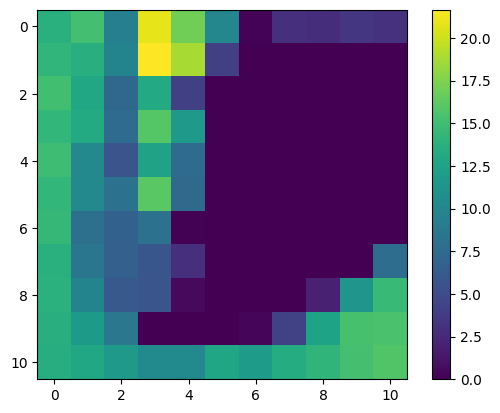

In [115]:
# ดู shape ของ feature maps ที่ได้
print("Shape of the final feature maps:", feature_maps.shape)

# แสดงภาพ feature maps ที่ได้
plt.imshow(feature_maps[0, :, :, 0], cmap='viridis') 
plt.colorbar()
plt.show()

<h1 style="font-size: 18px;">4.3 ทำการ flatten feature maps ทั้งหมด เพื่อเตรียมเข้า Neural Networks</h1>

In [116]:
# เพิ่ม Flatten Layer
model.add(Flatten())

# ดูภาพรวมของโมเดล
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
__________________________________________________

<h1 style="font-size: 18px;">4.1 สร้างโมเดลส่วน Classification (Fully-connected layers)</h1>

In [117]:
# เพิ่ม Fully-connected layers ในโมเดล
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

# Output Layer เป็น Probability ของทั้ง 3 Classes
model.add(Dense(3, activation='softmax')) # เนื่องจากเรามี 3 classes จึงต้องใช้ Softmax 3 nodes

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                495680    
                                                      

<h1 style="font-size: 18px;">4.2 กำหนดการ compile ของโมเดล และเทรนโมเดล</h1>

In [119]:
# กำหนดการ compile ของโมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
# เทรนโมเดล
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20


39/39 [==============================] - 3s 37ms/step - loss: 2.6510 - accuracy: 0.5825 - val_loss: 0.6118 - val_accuracy: 0.7655
Epoch 2/20
39/39 [==============================] - 1s 31ms/step - loss: 0.5043 - accuracy: 0.8047 - val_loss: 0.2768 - val_accuracy: 0.9218
Epoch 3/20
39/39 [==============================] - 1s 31ms/step - loss: 0.3741 - accuracy: 0.8538 - val_loss: 0.2440 - val_accuracy: 0.9055
Epoch 4/20
39/39 [==============================] - 1s 31ms/step - loss: 0.2648 - accuracy: 0.8995 - val_loss: 0.4944 - val_accuracy: 0.8730
Epoch 5/20
39/39 [==============================] - 1s 33ms/step - loss: 0.3777 - accuracy: 0.8627 - val_loss: 0.1808 - val_accuracy: 0.9609
Epoch 6/20
39/39 [==============================] - 1s 33ms/step - loss: 0.1918 - accuracy: 0.9240 - val_loss: 0.2052 - val_accuracy: 0.9316
Epoch 7/20
39/39 [==============================] - 1s 33ms/step - loss: 0.1843 - accuracy: 0.9346 - val_loss: 0.1378 - val_accuracy: 0.9577
Epoch 8/20
39/39 [======

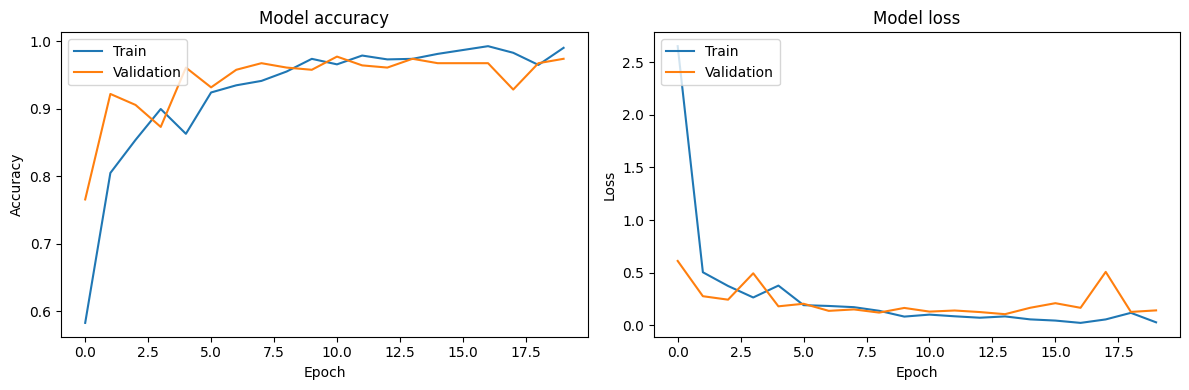

In [121]:
plt.figure(figsize=(12, 4))

# แสดงกราฟประวัติค่า accuracy ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# แสดงกราฟประวัติค่า loss ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

<h1 style="font-size: 18px;">4.3 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [122]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย Class จากภาพที่กำหนดให้
print(y_pred)

21/21 [==============================] - 0s 7ms/step
[[1.2417557e-03 9.9875700e-01 1.1368185e-06]
 [1.0000000e+00 2.8719629e-09 4.5913967e-13]
 [9.6911053e-06 9.9999034e-01 5.6582884e-08]
 ...
 [9.9999213e-01 7.9264573e-06 8.0111349e-09]
 [1.1095536e-04 1.8276303e-06 9.9988723e-01]
 [1.0000000e+00 8.1342213e-09 3.7575897e-12]]


In [123]:
y_pred = np.argmax(y_pred, axis=1) # แปลงความน่าจะเป็นของแต่ละคลาส ให้เป็นเลขของคลาสที่มีความน่าจะเป็นสูงสุด
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0,
       0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,

In [124]:
y_test =  np.argmax(y_test, axis=1) # แปลง y_test จาก one-hot เป็น int

print('y_pred: \n', y_pred)
print()
print('y_test: \n', y_test)

y_pred: 
 [1 0 1 0 0 1 1 1 0 0 0 2 2 2 0 0 1 1 0 1 1 2 1 0 2 0 1 2 2 2 0 1 1 1 2 0 2
 1 1 1 0 2 1 0 0 1 0 2 0 2 2 0 2 0 0 2 2 2 1 0 2 0 2 1 1 2 0 0 0 1 0 1 2 2
 0 1 2 1 1 0 0 2 2 2 2 2 0 1 2 1 1 2 2 2 2 0 1 0 0 0 2 2 1 1 2 1 2 2 1 1 2
 1 0 2 1 1 2 0 0 0 0 0 2 2 1 0 2 0 1 2 1 1 2 0 1 2 2 1 1 2 0 2 0 0 0 0 2 1
 1 1 1 0 2 1 0 2 0 0 1 0 0 0 0 1 0 2 1 2 0 2 2 1 0 1 1 1 1 1 1 2 1 0 1 0 2
 0 0 1 0 0 0 1 1 0 2 2 2 2 2 1 2 1 0 0 0 2 1 1 0 2 1 1 1 0 0 1 2 0 0 1 0 2
 2 1 2 1 2 2 0 1 2 2 1 1 1 0 1 1 1 0 1 0 2 2 0 1 0 2 0 2 0 0 1 1 0 0 2 1 1
 0 2 2 0 2 0 1 1 0 0 1 0 0 2 1 2 1 2 0 2 2 2 1 2 2 0 0 0 2 1 0 1 2 0 2 2 2
 2 2 1 2 2 0 1 2 1 0 0 0 0 0 1 1 1 1 2 2 2 1 2 1 2 2 2 0 2 0 0 2 1 0 1 1 2
 1 2 1 1 0 1 2 2 2 2 2 0 0 2 2 2 1 2 2 2 1 1 0 2 2 2 2 0 0 2 0 0 2 1 1 2 2
 2 1 2 0 1 0 1 2 2 2 0 1 1 2 1 1 2 2 0 0 0 2 2 1 1 0 1 0 1 2 0 0 1 2 1 0 2
 1 2 0 1 2 2 1 2 1 2 0 1 1 2 1 1 1 1 2 0 0 0 0 2 1 1 2 1 0 2 2 0 1 1 1 2 1
 0 1 0 0 0 2 2 2 2 1 0 1 0 0 0 0 1 2 0 1 2 0 1 2 2 0 0 1 0 2 2 1 1 1 2 2 2
 1 1 0 1 2 0 2 

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การวัดผลโมเดล (Model Evaluation)</h1>

เช่นเดียวกัน ในการวัดผลการทำ Multiclass-Classification Model เราก็ยังต้องใช้ Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

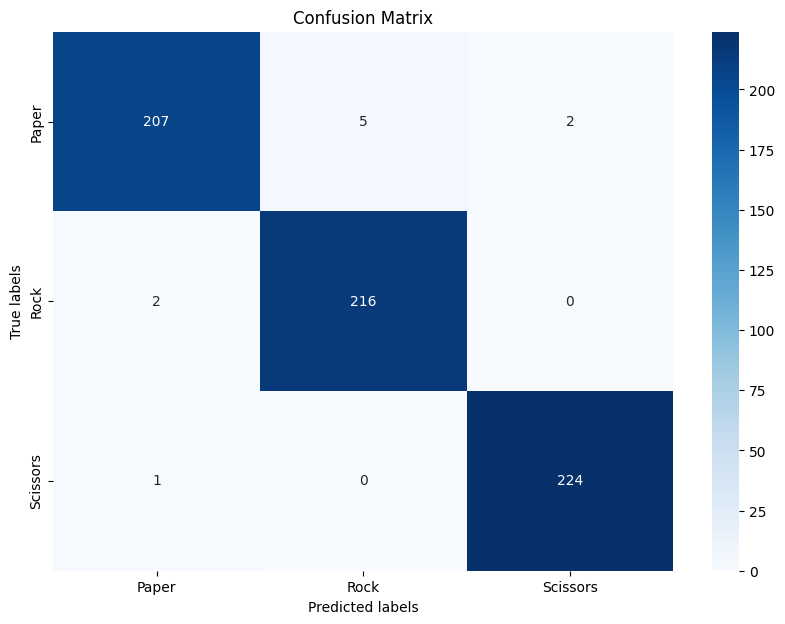

In [126]:
# สร้าง confusion matrix
cm = confusion_matrix(y_test, y_pred)
label = ['Paper','Rock', 'Scissors']

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [127]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

เนื่องจาก **precision_score**, **recall_score**, และ **f1_score** ใน scikit-learn มีค่าเริ่มต้นเป็น average = 'binary' 

ซึ่งเหมาะสมสำหรับงาน binary-classification แต่เมื่อต้องจัดการกับปัญหา multiclass-classification เราต้องระบุวิธีการคำนวณ average ใหม่

- **micro**: คำนวณแมทริกซ์โดยรวมทั้งหมด โดยนับจำนวน true positives, false negatives, และ false positives ทั้งหมด
    - ข้อดี: ประเมินความแม่นยำรวมทั้งหมดของระบบ โดยไม่คำนึงถึงการไม่สมดุลของข้อมูลหรือคลาส (Class imbalance)
    - ข้อเสีย: ไม่สามารถบ่งบอกถึงประสิทธิภาพในการจำแนกของแต่ละคลาส
 ----------------------------
- **macro**: คำนวณแมทริกซ์สำหรับแต่ละคลาส แล้วหาค่าเฉลี่ยที่ไม่ถูกถ่วงน้ำหนัก ซึ่งไม่คำนึงถึงการไม่สมดุลของคลาส
    - ข้อดี: ประเมินความแม่นยำของแต่ละคลาสแยกต่างหาก และคำนวณค่าเฉลี่ย มีประโยชน์สำหรับข้อมูลที่มีการไม่สมดุลระหว่างแต่ละคลาส
    - ข้อเสีย: ไม่คำนึงถึงจำนวนตัวอย่างในแต่ละคลาส
    ซึ่งสามารถทำให้ได้ผลลัพธ์ที่ไม่แทนความเป็นจริงหากคลาสใดคลาสหนึ่งมีจำนวนตัวอย่างน้อยมาก
 ------------------------
- **weighted**: คำนวณแมทริกซ์สำหรับแต่ละคลาส แล้วหาค่าเฉลี่ยที่ถูกถ่วงน้ำหนักตามจำนวนคลาสจริงสำหรับแต่ละคลาส
    - ข้อดี: ประเมินความแม่นยำของแต่ละคลาสแยกต่างหาก แต่ค่าเฉลี่ยถูกถ่วงน้ำหนักตามจำนวนตัวอย่างในแต่ละคลาส ประโยชน์สำหรับข้อมูลที่มีการไม่สมดุลระหว่างคลาส
    - ข้อเสีย: หากต้องการค่าการประเมินที่เป็นกลางและไม่ถูกส่งเสียโดยการไม่สมดุลของข้อมูล การใช้ weighted อาจไม่เหมาะสม

In [128]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision:.4f}")
print(f"ความครอบคลุม (Recall): {recall:.4f}")
print(f"คะแนน F1 (F1-Score): {f1:.4f}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.9848
ความแม่นยำของการทำนายคลาสบวก (Precision): 0.9847
ความครอบคลุม (Recall): 0.9846
คะแนน F1 (F1-Score): 0.9846
ค่าสหสัมพันธ์แมทธิว (MCC): 0.9772


<h1 style="font-size: 18px; font-weight: bold;"> Classification Report</h1>

In [129]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [130]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       214
           1       0.98      0.99      0.98       218
           2       0.99      1.00      0.99       225

    accuracy                           0.98       657
   macro avg       0.98      0.98      0.98       657
weighted avg       0.98      0.98      0.98       657

